In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

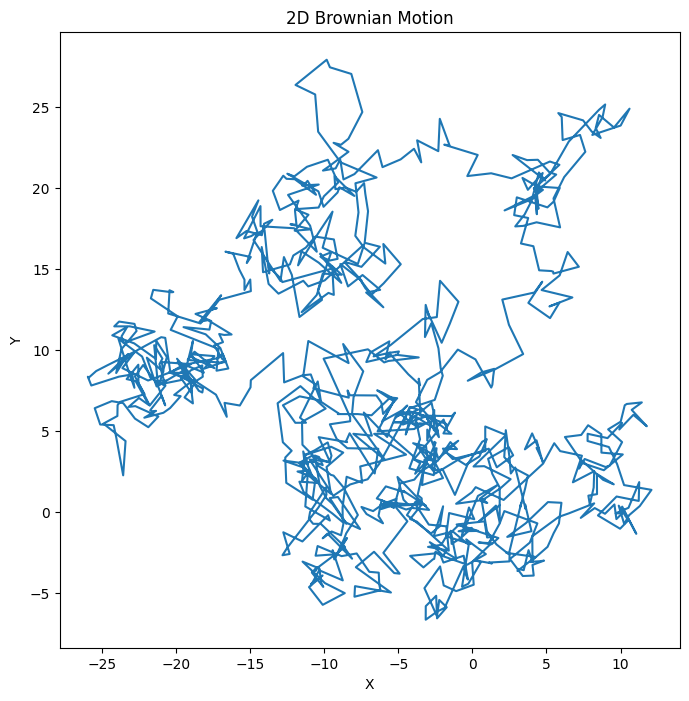

In [3]:
steps = 1000
random.seed(42)

x, y = np.cumsum(np.random.randn(steps)), np.cumsum(np.random.randn(steps))

points = 20
ip = lambda x, steps, points: np.interp(np.arange(steps*points), np.arange(steps)*points, x)

X, Y = ip(x, steps, points), ip(y, steps, points)

fig, ax = plt.subplots(1, 1, figsize = (8, 8))
ax.set_title('2D Brownian Motion')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.plot(X, Y)

In [12]:
class Brownian():
    """
    A Brownian motion class
    """
    def __init__(self, x0 = 0):
        """
        Expect a float or None for the initial value
        """

        self.x0 = float(x0)

    def gen_random_walk(self, n_step = 100):
        """
        Generate motion by random walk

        """
        # Warning about very small number of steps
        if n_step < 25:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence.")

        w = np.ones(n_step)*self.x0

        for i in range(1, n_step):
            #Sampling from Normal distribution with probability 0.5
            yi = np.random.choice([1, -1])

            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))

        return w

    def gen_normal(self, n_step = 100):
        """
        Generate motion by drawing from Normal distribution

        """
        if n_step < 30:
            print("WARNING! The number of steps is small. It may not generate a good stochastic process sequence.")

        w = np.ones(n_step)*self.x0

        for i in range(1,n_step):
            # Sampling from Normal distribution
            yi = np.random.normal()

            # Weiner process
            w[i] = w[i-1]+(yi/np.sqrt(n_step))

        return w



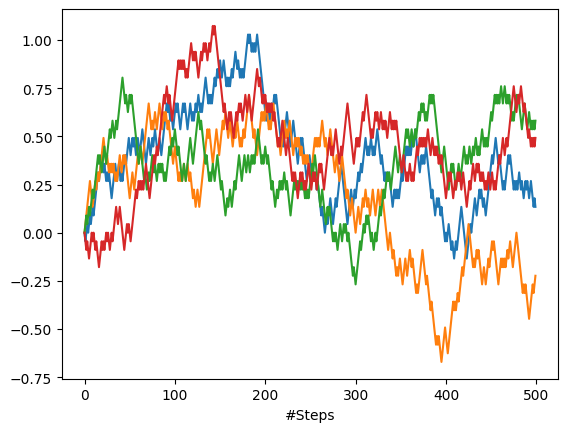

In [13]:
b = Brownian()
for i in range(4):
    plt.plot(b.gen_random_walk(500))
    plt.xlabel('#Steps')
plt.show()

>> Weiner process: https://en.wikipedia.org/wiki/Wiener_process
>> Brownian motion: https://en.wikipedia.org/wiki/Brownian_motion


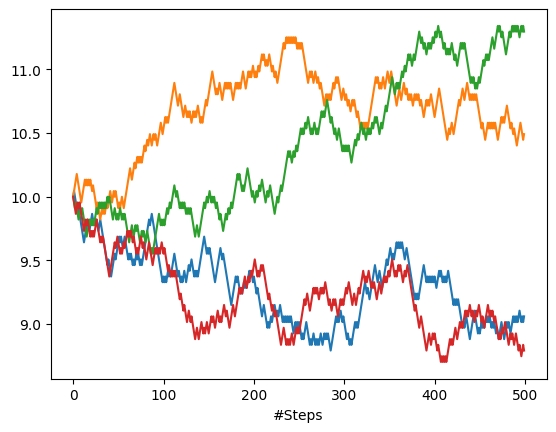

In [14]:
b = Brownian(10)
for i in range(4):
    plt.plot(b.gen_random_walk(500))
    plt.xlabel('#Steps')
plt.show()

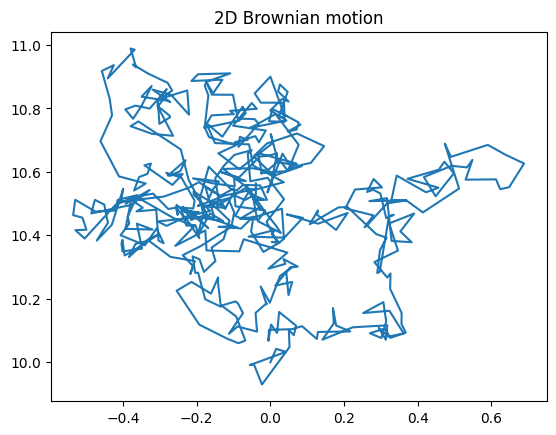

In [23]:
b1 = Brownian()     #initial value = 0
b2 = Brownian(10)

x = b1.gen_normal(500)
y = b2.gen_normal(500)

#xmax, xmin, ymax, ymin = x.max(), x.min(), y.max(), y.min()
#scale_factor = 1.25
#xmax, xmin, ymax, ymin = xmax*scale_factor, xmin*scale_factor, ymax*scale_factor, ymin*scale_factor

plt.plot(x, y)
#plt.xlim(xmin, xmax)
#plt.ylim(ymin, ymax)
plt.title('2D Brownian motion')
plt.show()